In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../DATA/Ames_Housing_Data.csv")

## Tasks
#### -Detect missing values and handle them
#### -Deal with outliers  (use heatmaps ,boxplots,)
#### -Deal with categorical values
#### -Normalize numerical values - Scale


In [3]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data = data.drop('PID',axis=1)

In [5]:
def investigate(df):
    
    
    print('# of data :',df.shape[0])
    print('# of features :',df.shape[1])
    print('-'*10)
    print('COLUMN NAMES: ',df.columns)
    print('-'*10)
    print('Types of each columns is: \n',df.dtypes) 
    print('-'*10)
    print('Null values for each columns is :\n',df.isnull().sum().sort_values(ascending=False))
    print('-'*10)
  

investigate(data)   

# of data : 2930
# of features : 80
----------
COLUMN NAMES:  Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',

## Counting missing values

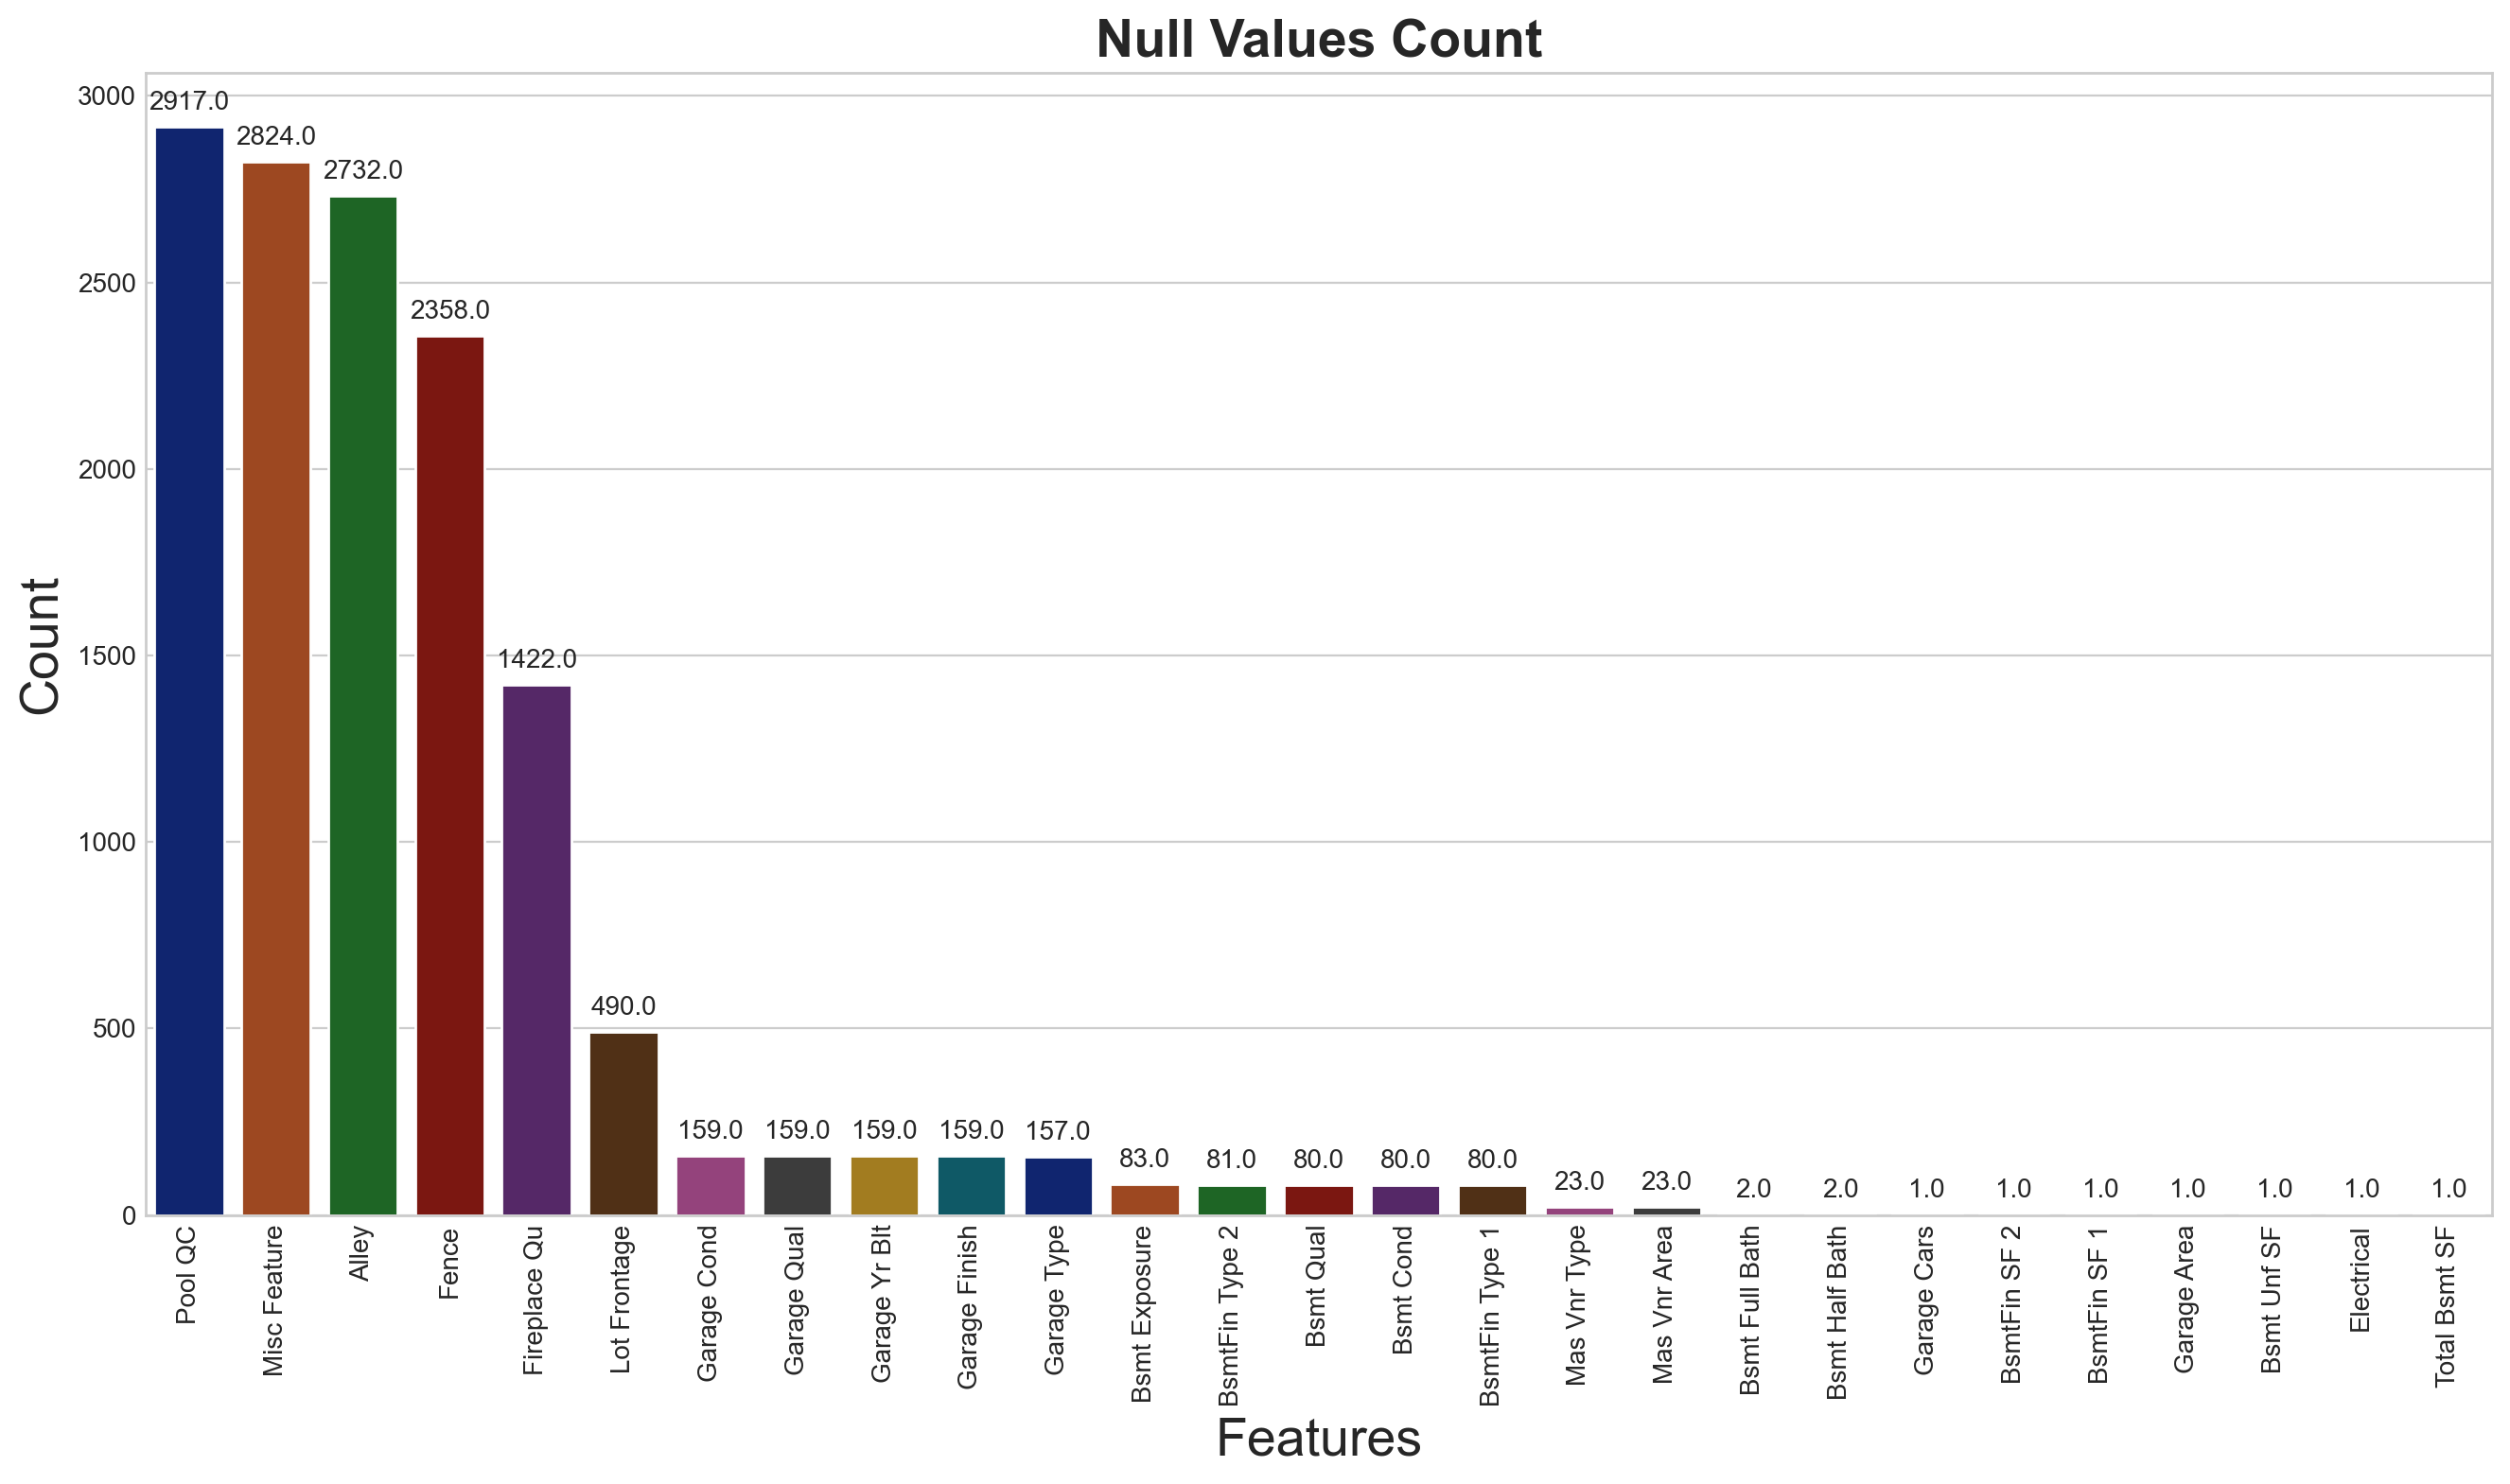

In [6]:
plt.figure(figsize=(16,8),dpi=200)
null_values = data.isnull().sum().sort_values(ascending=False)
null_values =null_values[null_values >0] 
splot = sns.barplot(x=null_values.index,y=null_values,palette="dark")

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Features',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Null Values Count',fontsize=20,weight="bold")
plt.xticks(rotation=90);


In [7]:
data = data.drop(['Pool QC','Mics Feature'])

KeyError: "['Pool QC' 'Mics Feature'] not found in axis"

## Identify percentage of missing data

In [ ]:
plt.figure(figsize=(16,8),dpi=200)
null_values = data.isnull().sum().sort_values(ascending=False)
null_values =null_values[null_values >0] 
null_values = (null_values/len(data))*100
splot = sns.barplot(x=null_values.index,y=null_values,palette="Dark2")

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f')+ " %", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Features',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Null Values Percentage',fontsize=20,weight="bold")
plt.xticks(rotation=90);


In [ ]:
index =null_values[(null_values>80.0)].index
data=data.drop(index,axis=1)

In [ ]:
data['Fireplace Qu'] = data['Fireplace Qu'].fillna("None")


In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.corr()['SalePrice'].sort_values(ascending = False).abs().nlargest(10)

In [ ]:
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=data)

In [ ]:
data['Garage Area'] = data['Garage Area']

In [ ]:
sns.scatterplot(x='Garage Area',y='SalePrice',data=data)

In [ ]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [ ]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [ ]:
index_d = data[(data['Gr Liv Area']>4000)&(data['SalePrice']<200000)].index


In [ ]:
data = data.drop(index_d,axis=0)

In [ ]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [ ]:
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=data)

In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    return out


outliers = Zscore_outlier(data['Gr Liv Area'])
index_to_drop = data[data.isin(outliers)]['Gr Liv Area'].dropna().sort_values().index
data= data.drop(index_to_drop,axis=0)
sns.boxplot(data['Gr Liv Area'])

In [ ]:
outliers_garage= Zscore_outlier(data['Garage Area'])
index_to_drop_garage = data[data.isin(outliers_garage)]['Garage Area'].dropna().sort_values().index
data= data.drop(index_to_drop_garage,axis=0)
sns.boxplot(data['Garage Area'])

In [ ]:
sns.boxplot(data['Garage Area'])

In [ ]:
import scipy.stats as stats

In [ ]:
outs=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            outs.append(i)
    return outs



## Outlier handling with IQR

In [ ]:
outliers = iqr_outliers(data['Gr Liv Area'])

index_to_drop = data[data.isin(outliers)]['Gr Liv Area'].dropna().sort_values().index
data= data.drop(index_to_drop,axis=0)
sns.boxplot(data['Gr Liv Area'])

In [ ]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data)

In [ ]:
sns.boxplot(data['Garage Area'])

In [ ]:
outliers_g = iqr_outliers(data['Garage Area'])

index_to_drop_g = data[data.isin(outliers_g)]['Garage Area'].dropna().sort_values().index
data= data.drop(index_to_drop_g,axis=0)
sns.boxplot(data['Garage Area'])

In [ ]:
from sklearn.cluster import DBSCAN

def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 2, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    print(data['cluster'].value_counts().sort_values(ascending=False))


In [ ]:
sns.scatterplot(x='Total Bsmt SF',y='SalePrice',data=data)

In [ ]:
data['Total Bsmt SF']=data['Total Bsmt SF'].fillna(0)
data['Total Bsmt SF'].isnull().sum()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('BEFORE-Outlier Handling - Total Basement SF')
axes[0].set_title('SCATTER')
sns.scatterplot(ax=axes[0],x='Total Bsmt SF',y='SalePrice',data=data)
axes[1].set_title('BOX')
sns.boxplot(data['Total Bsmt SF'])

In [ ]:
outliers = iqr_outliers(data['Total Bsmt SF'])

index_to_drop = data[data.isin(outliers)]['Total Bsmt SF'].dropna().sort_values().index
data= data.drop(index_to_drop,axis=0)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('AFTER-Outlier Handling - Total Basement SF')
axes[0].set_title('SCATTER')
sns.scatterplot(ax=axes[0],x='Total Bsmt SF',y='SalePrice',data=data)
axes[1].set_title('BOX')
sns.boxplot(data['Total Bsmt SF'])

In [ ]:
A = DB_outliers(data['Total Bsmt SF']) 


In [ ]:
plt.figure(figsize=(16,8),dpi=200)
null_values = data.isnull().sum().sort_values(ascending=False)
null_values =null_values[null_values >0] 
null_values = (null_values/len(data))*100
splot = sns.barplot(x=null_values.index,y=null_values,palette="Dark2")

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f')+ " %", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xlabel('Features',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Null Values Percentage',fontsize=20,weight="bold")
plt.xticks(rotation=90);


In [ ]:
data['Garage Yr Blt']=data['Garage Yr Blt'].fillna(2005.0)
data['Garage Finish']=data['Garage Finish'].fillna('Not Given')
data['Garage Cond']=data['Garage Cond'].fillna('Not Given')
data['Garage Qual']=data['Garage Qual'].fillna('Not Given')
data['Garage Type']=data['Garage Type'].fillna('Not Given')
data['Mas Vnr Area']=data['Mas Vnr Area'].fillna(0.0)
data['Mas Vnr Type']=data['Mas Vnr Type'].fillna('None')
data['Bsmt Exposure']=data['Bsmt Exposure'].fillna('Not Given')
data['Garage Area']=data['Garage Area'].fillna(0.0)
data['Garage Cars']=data['Garage Cars'].fillna(2.0)
data['Electrical']=data['Electrical'].fillna('Not Given')

data.dropna(subset = ["Lot Frontage"], inplace=True)


In [ ]:
data.corr()['SalePrice'].sort_values(ascending = False).abs().nlargest(10)

In [ ]:
sns.boxplot(data['Full Bath'])

In [ ]:
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude='object')
data_obj = pd.get_dummies(data_obj,drop_first=True)

final_df = pd.concat([data_num,data_obj],axis=1)

In [ ]:
final_df

In [ ]:
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
preds = model.predict(X_test)